# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?

The learning rate  is the most critical "knob" you can turn in machine learning. It determines how big a step you take in the direction of the steepest descent.
(1)The "Too Large" Rate (Overstepping): If your stride is too long, you might step right over the bottom of the valley and land on the opposite slope. Instead of settling at the minimum, the hiker starts bouncing back and forth. In training, this looks like the loss function oscillating wildly or even "exploding" (getting larger over time).
(2)The "Too Small" Rate (Crawl): If your stride is tiny, you will eventually reach the bottom, but it might take you until next year to get there. Small learning rates are safe, but they are computationally expensive and risk getting the hiker stuck in a "pothole" (a local minimum or a flat plateau) instead of the actual valley floor.
(3)The "Just Right" Rate: The ideal rate is large enough to make progress quickly but small enough to settle into the narrowest part of the curve without bouncing out.

Strategies for Choosing the Learning Rate

1. Constant Learning Rate (The Baseline)
You pick one number (like 0.01) and stick with it. It’s simple, but rarely optimal because the rate that works at the beginning of training is usually too aggressive for the "fine-tuning" needed at the end.

2. Learning Rate Schedules (Decay)
The idea here is simple: start fast to cover ground, then slow down as you get closer to the goal.
Step Decay: Drop the rate by a factor (e.g., half) every 10 epochs.
Exponential Decay: Smoothly decrease the rate over time.
Time-based Decay: Mathematically link the rate to the number of iterations.

3. Adaptive Learning Rate Algorithms (The Modern Way)
Instead of you picking a schedule, the algorithm looks at the "terrain" and adjusts the rate automatically for every single parameter in your model.
AdaGrad: Scales the rate based on how frequently a parameter is updated (great for sparse data).
RMSProp: An improvement on AdaGrad that prevents the learning rate from dropping to zero too quickly.
Adam (Adaptive Moment Estimation): The "gold standard" today. It combines the ideas of momentum (keeping some speed from previous steps) and adaptive scaling. It’s like a hiker with a compass and a memory of their recent speed.

4. Cyclical Learning Rates & Warm-ups
Warm-up: Start with a very tiny rate and ramp up to the "main" rate. This prevents the model from "panicking" and diverging in the first few unstable steps.
Cyclical Rates: You let the rate oscillate between a floor and a ceiling. This helps the model "jump out" of local minima or sharp valleys to find a more stable, flatter minimum.



#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

Changing Hyperparameters (Observation)
Higher Learning Rate (e.g., 0.1): SGD might converge much faster but could oscillate significantly around the minimum, leading to a slightly worse MSE than GD.

Too Low Learning Rate (e.g., 0.0001): 100 epochs will not be enough. The model will "underfit" because it hasn't reached the valley floor yet.

More Epochs: SGD usually reaches a "good enough" solution very early. Adding more epochs might not improve R² significantly but will make the path smoother.

h) Why is SGD Erratic vs. GD?
1. Why the path is erratic:

Batch GD: It looks at the entire dataset to calculate the average gradient. It takes one very calculated, smooth step toward the minimum.

SGD: It looks at only one random sample at a time. That single sample might be an "outlier" or not representative of the whole group. Therefore, the gradient might point in a slightly "wrong" direction. This causes the jumping or "noisy" behavior you see in the path.
2. Why SGD is preferred for large datasets:

Computational Efficiency: If you have 10 million rows, Batch GD must calculate 10 million gradients before taking one step. That requires massive RAM and time. SGD takes a step after seeing just one row. It can start learning immediately.

Escaping Local Minima: The "noise" in SGD is actually a feature, not a bug. In complex non-convex functions (like Deep Learning), the jumping behavior helps the model bounce out of shallow "potholes" (local minima) to potentially find a deeper, better global minimum.

Redundancy: In large datasets, many rows are similar. GD wastes time calculating nearly identical gradients for the whole batch, while SGD gets the "gist" of the data much faster.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load and Preprocess
df = pd.read_csv('Real estate.csv')
X = df.drop(['No', 'X1 transaction date', 'Y house price of unit area'], axis=1).values
y = df['Y house price of unit area'].values.reshape(-1, 1)
# Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Add bias term (column of 1s)
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
# Parameters
lr = 0.01
epochs = 100
m = len(X_train_b)
#  Batch Gradient Descent
theta_gd = np.random.randn(X_train_b.shape[1], 1)
for epoch in range(epochs):
    gradients = 2/m * X_train_b.T.dot(X_train_b.dot(theta_gd) - y_train)
    theta_gd = theta_gd - lr * gradients
#  Stochastic Gradient Descent
theta_sgd = np.random.randn(X_train_b.shape[1], 1)
for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_train_b[random_index:random_index+1]
        yi = y_train[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)
        theta_sgd = theta_sgd - lr * gradients
y_pred_gd = X_test_b.dot(theta_gd)
y_pred_sgd = X_test_b.dot(theta_sgd)

# Evaluation
print(f"GD  - MSE: {mean_squared_error(y_test, y_pred_gd):.4f}, R2: {r2_score(y_test, y_pred_gd):.4f}")
print(f"SGD - MSE: {mean_squared_error(y_test, y_pred_sgd):.4f}, R2: {r2_score(y_test, y_pred_sgd):.4f}")

GD  - MSE: 79.0821, R2: 0.5286
SGD - MSE: 67.2954, R2: 0.5989


# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction

ANSWERS

a)
A Decision Tree is a supervised learning algorithm.

Explanation: In supervised learning, the model is trained on a labeled dataset, meaning the input data comes with the correct answers (targets). A Decision Tree uses these labels to learn a sequence of "if-else" questions based on feature values. The goal is to map inputs to the known outputs (either categories for classification or continuous values for regression) by creating branches that eventually lead to a prediction.

b)In decision trees, entropy is a mathematical measure of impurity or disorder within a dataset.5 It quantifies how "mixed" the labels are in a particular node.High Entropy: If a node contains an equal mix of different classes (e.g., 50% "Yes" and 50% "No"), the entropy is at its maximum (1.0).6 It is highly disordered and unpredictable.7Low Entropy: If a node contains only one class (e.g., 100% "Yes"), the entropy is at its minimum (0).8 The node is "pure."The Formula:For a binary classification, entropy ($H$) is calculated as:$$H(S) = -p_{+} \log_2(p_{+}) - p_{-} \log_2(p_{-})$$where $p_{+}$ is the probability of the positive class and $p_{-}$ is the probability of the negative class.

c)
Reduction in entropy (commonly referred to as Information Gain) signifies that a split has made the data more organized and pure.

When a node is split into child nodes, the algorithm compares the entropy of the parent node to the weighted average entropy of the child nodes. A significant reduction indicates:

Increased Certainty: The algorithm has found a feature that effectively separates the classes.

Better Homogeneity: The resulting child nodes are more likely to contain a majority of a single class compared to the parent node.

Progress toward a Decision: The tree is successfully "learning" the patterns in the data to reach a point where it can make a confident prediction at the leaf nodes.

(d)1. Compute the Entropy of the Root NodeFirst, let's identify the distribution of classes in our 10-point dataset:Total points ($N$): 10Positive (+) labels: Points 2, 3, 4, 5, 6 (Total = 5)Negative (−) labels: Points 1, 7, 8, 9, 10 (Total = 5)Since there is an equal split (50/50), we can expect maximum entropy.$$Entropy(Root) = -\left(\frac{5}{10} \log_2 \frac{5}{10}\right) - \left(\frac{5}{10} \log_2 \frac{5}{10}\right)$$$$Entropy(Root) = -(0.5 \times -1) - (0.5 \times -1) = 0.5 + 0.5 = \mathbf{1.00}$$

2. Compute Entropy and Reduction for Each SplitSplit 1: $(x \leq -2?)$Left Child (True): Point 1 only. (Class: −)Count: 0 (+), 1 (−). Total = 1.$Entropy(Left) = 0$ (Pure node).Right Child (False): Points 2, 3, 4, 5, 6, 7, 8, 9, 10.Count: 5 (+), 4 (−). Total = 9.$Entropy(Right) = -\left(\frac{5}{9} \log_2 \frac{5}{9}\right) - \left(\frac{4}{9} \log_2 \frac{4}{9}\right)$$Entropy(Right) = -[0.56 \times (\log_2 5 - \log_2 9)] - [0.44 \times (\log_2 4 - \log_2 9)]$$Entropy(Right) \approx 0.99$Weighted Entropy: $\frac{1}{10}(0) + \frac{9}{10}(0.99) = 0.891$Entropy Reduction: $1.00 - 0.89 = \mathbf{0.11}$Split 2: $(x \leq 2?)$Left Child (True): Points 1, 3, 4, 5, 6, 7, 8, 9, 10.Count: 4 (+), 5 (−). Total = 9.$Entropy(Left) \approx 0.99$ (Same calculation as Split 1 Right Child).Right Child (False): Point 2 only. (Class: +)Count: 1 (+), 0 (−). Total = 1.$Entropy(Right) = 0$ (Pure node).Weighted Entropy: $\frac{9}{10}(0.99) + \frac{1}{10}(0) = 0.891$Entropy Reduction: $1.00 - 0.89 = \mathbf{0.11}$Split 3: $(y \leq 2?)$This split uses the y-coordinate. Let's look at the points:Left Child ($y \leq 2$): Points 1, 3, 4, 5, 6 (y values: 0, 1, -1, 1, -1).Class Labels: 1(−), 3(+), 4(+), 5(+), 6(+).Count: 4 (+), 1 (−). Total = 5.$Entropy(Left) = -\left(\frac{4}{5} \log_2 \frac{4}{5}\right) - \left(\frac{1}{5} \log_2 \frac{1}{5}\right)$$Entropy(Left) = -[0.8 \times (2 - 2.32)] - [0.2 \times (0 - 2.32)]$$Entropy(Left) = -[0.8 \times -0.32] - [0.2 \times -2.32] = 0.256 + 0.464 = 0.72$Right Child ($y > 2$): Points 2, 7, 8, 9, 10 (y values: 3, 5, 3, 5, 3).Class Labels: 2(+), 7(−), 8(−), 9(−), 10(−).Count: 1 (+), 4 (−). Total = 5.$Entropy(Right)$ will be the same as $Entropy(Left)$ because the proportions are mirrored (4:1).$Entropy(Right) = 0.72$Weighted Entropy: $\frac{5}{10}(0.72) + \frac{5}{10}(0.72) = 0.72$Entropy Reduction: $1.00 - 0.72 = \mathbf{0.28}$




```
Split Question,Left Node Entropy,Right Node Entropy,Entropy Reduction (IG),
x≤−2            0                        0.99                  0.11
x≤2,            0.99                     0                     0.11
y≤2,            0.72                     0.72                  0.28


```

Final Selection:The split $(y \leq 2)$ should be chosen because it provides the maximum entropy reduction (0.28).


### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


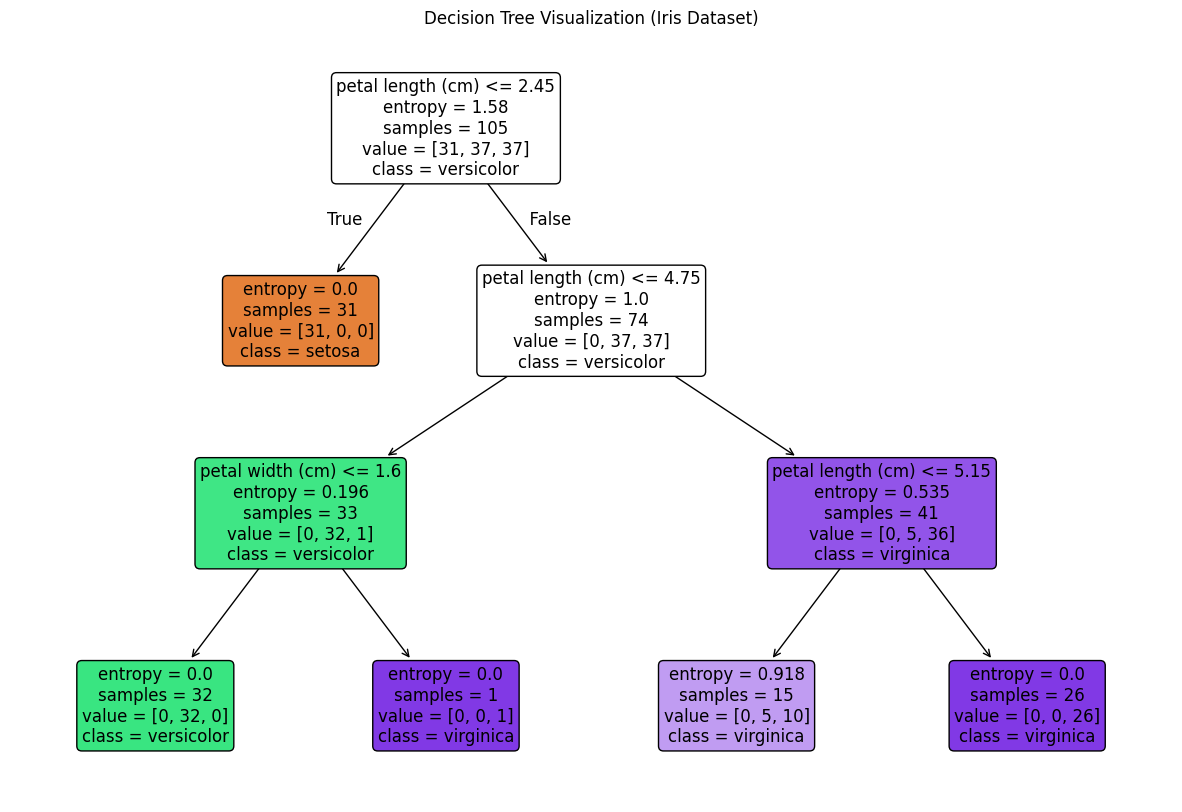

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)
plt.figure(figsize=(15, 10))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=12)

plt.title("Decision Tree Visualization (Iris Dataset)")
plt.show()

# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.

ANSWERS

a)
A Support Vector Machine (SVM) is a supervised learning algorithm.

Explanation: SVM requires a labeled dataset to learn the relationship between features and their corresponding classes (Classification) or continuous values (Regression). It functions by looking at the "answers" provided in the training data to establish a boundary that best separates different categories.

b)The margin is the distance between the decision boundary (the hyperplane) and the closest data points from either class.

Why SVM aims to maximize the margin: SVM is often called a Maximum Margin Classifier. It aims to find the "widest street" possible between classes for two main reasons:

Generalization: A larger margin reduces the chance of misclassifying new, unseen data points that might lie near the boundary.

Robustness: It provides a "safety buffer." If the boundary is too close to the data points, even a small amount of noise in the data could cause a point to cross the line and be incorrectly categorized.

c)Support Vectors are the data points that lie closest to the decision boundary. They are the "most difficult" points to classify and are the only points that actually determine the position and orientation of the hyperplane.

 they are important in defining the boundary because of:

Critical Influence: If you move or remove a support vector, the position of the decision boundary will change.

Efficiency: Points that are far away from the boundary do not matter. Once the support vectors are identified, the rest of the dataset can theoretically be discarded without changing the model. This makes SVM memory-efficient during the prediction phase.

d)The Kernel Function is used to handle non-linearly separable data. Sometimes, data points are mixed in such a way that no straight line can separate them in their current 2D or 3D space.


The Purpose: The "Kernel Trick" mathematically transforms the data into a higher-dimensional space where a linear hyperplane can be used to separate the classes. It does this without actually performing the complex coordinate transformations, which saves significant computing power.

Two Commonly Used Kernel Functions:

Polynomial Kernel: Useful for data that follows a curved boundary.

RBF (Radial Basis Function) / Gaussian Kernel: The most popular choice; it can handle complex, circular, or overlapping class distributions by mapping them into an infinite-dimensional space.



### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small

ANSWERS

a)In a linearly separable dataset, there are infinite possible lines (hyperplanes) that could separate the data. SVM chooses the Optimal Separating Hyperplane by using the Maximum Margin principle.2Distance Calculation: SVM identifies the distance between the hyperplane and the closest data points from each class.3Optimization: It mathematically solves an optimization problem to maximize this distance (the margin).4The Formula: If the hyperplane is defined as $w \cdot x + b = 0$, the margin is calculated as $2/\|w\|$. Minimizing $\|w\|$ maximizes the margin.

b) Handling Non-Linearly Separable DataWhen data cannot be separated by a straight line in its current form, SVM uses two primary techniques:Slack Variables (Soft Margin):The algorithm introduces "slack variables" (5$\xi$) that allow some data points to be on the wrong side of the margin or even the wrong side of the hyperplane.6 This prevents the model from failing entirely when there is a bit of noise or overlap.The Kernel Trick:If a linear boundary is impossible in 2D, SVM maps the data into a higher-dimensional space (e.g., 3D or more).7 In this new space, a linear hyperplane can often separate the classes perfectly. Once projected back to the original 2D space, this linear boundary appears as a non-linear (curved) one.

c) The Role of the Regularization Parameter $C$The parameter 9$C$ acts as a penalty for misclassification.10 It controls the trade-off between having a smooth decision boundary (large margin) and classifying training points correctly.When $C$ is Very Large:Strictness: The model is penalized heavily for any misclassified points.11Behavior: It behaves like a "Hard Margin" SVM. It will try to classify every single training point correctly, even if it results in a very narrow and "wiggly" margin.Risk: High risk of Overfitting. The model may work perfectly on training data but fail on new test data.When $C$ is Very Small:Leniency: The model is "relaxed" about misclassifications.12Behavior: It behaves like a "Soft Margin" SVM. It prioritizes a wide margin over perfect classification. It will ignore "outliers" to maintain a simpler, more robust boundary.13Risk: Risk of Underfitting if $C$ is so small that it ignores important patterns in the data.